In [130]:
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

classes = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def load_dataset():
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

	print(f'Train: X = {trainX.shape}, y = {trainY.shape}')
	print(f'Test: X = {testX.shape}, y = {testY.shape}')

	# plot first few images
	for i in range(9):
		plt.subplot(330 + 1 + i)
		plt.imshow(trainX[i])
		plt.title(classes[trainY[i]])
		plt.axis('off')
  
	plt.show()

	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))

	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	
	return trainX, trainY, testX, testY


In [61]:
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
    
	return train_norm, test_norm

In [62]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(learning_rate=0.01)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [63]:
def run_model():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = define_model()
	model.fit(trainX, trainY, epochs=10, batch_size=32)
	model.save('fashion_mnist.h5')
	_, acc = model.evaluate(testX, testY, verbose=0)
	print(f'Accuracy: {round(acc * 100, 2)}')
	print(f'Model: {model.summary()}')

Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


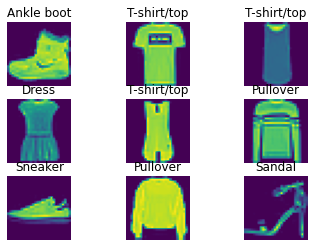

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5460 - accuracy: 0.8020
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3948 - accuracy: 0.8590
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3504 - accuracy: 0.8730
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3224 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3026 - accuracy: 0.8902
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2859 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2730 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2603 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2502 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [64]:
run_model()

In [128]:
from keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

def test_model():
    model = load_model('fashion_mnist.h5')
    
    tshirt = load_img('t-shirt.jpg', grayscale=True, target_size=(28, 28))
    sandal = load_img('sandal.jpg', grayscale=True, target_size=(28, 28))
    dress = load_img('dress.jpg', grayscale=True, target_size=(28, 28))
    pullover = load_img('pullover.png', grayscale=True, target_size=(28, 28))
    trousers = load_img('trousers.jpg', grayscale=True, target_size=(28, 28))
    
    test_images = [tshirt, sandal, dress, pullover, trousers]
    test_names = ['T-shirt', 'Sandal', 'Dress', 'Pullover', 'Trousers']
    
    for i in range(5):
        test_images[i] = img_to_array(test_images[i])
        test_images[i] = test_images[i].reshape(1, 28, 28, 1)
        test_images[i] = test_images[i].astype('float32') / 255.0
        
        pred = list(model.predict(test_images[i])[0])
        print('Expected: ', test_names[i])
        print('Predicted: ', classes[pred.index(max(pred))], end='\n\n')

In [131]:
test_model()

Expected:  T-shirt
Predicted:  T-shirt/top

Expected:  Sandal
Predicted:  Bag

Expected:  Dress
Predicted:  Bag

Expected:  Pullover
Predicted:  Pullover

Expected:  Trousers
Predicted:  Trousers

